In [2]:
import gym
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3")

class SARSAAgent:
    def __init__(self, n_actions, alpha=0.1, gamma=0.99, epsilon=0.1, epsilon_decay=0.995, min_epsilon=0.01):
        self.q_table = defaultdict(lambda: np.zeros(n_actions))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.n_actions = n_actions

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.n_actions)  # Explore
        else:
            return np.argmax(self.q_table[state])     # Exploit

    def update(self, state, action, reward, next_state, next_action):
        current_q = self.q_table[state][action]
        next_q = self.q_table[next_state][next_action] if next_action is not None else 0.0
        target = reward + self.gamma * next_q
        self.q_table[state][action] += self.alpha * (target - current_q)

    def decay_epsilon(self):
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

def train_agent(env, agent, num_episodes):
    episode_rewards = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        action = agent.choose_action(state)
        done = False
        total_reward = 0

        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward
            done = terminated or truncated
            next_action = agent.choose_action(next_state) if not done else None
            agent.update(state, action, reward, next_state, next_action)
            state, action = next_state, next_action if next_action is not None else action

        agent.decay_epsilon()
        episode_rewards.append(total_reward)
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}/{num_episodes}, Reward: {total_reward}, Epsilon: {agent.epsilon:.3f}")

    return episode_rewards

def evaluate_agent(env, agent, num_episodes):
    total_rewards = 0
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_reward = 0

        while not done:
            action = np.argmax(agent.q_table[state])  # Greedy policy
            next_state, reward, terminated, truncated, _ = env.step(action)
            episode_reward += reward
            state = next_state
            done = terminated or truncated

        total_rewards += episode_reward

    average_reward = total_rewards / num_episodes
    print(f"Average Reward over {num_episodes} episodes: {average_reward}")
    return average_reward

def visualize_episode(env, agent):
    state, _ = env.reset()
    done = False
    frames = []

    while not done:
        action = np.argmax(agent.q_table[state])
        frames.append(env.render())
        next_state, reward, terminated, truncated, _ = env.step(action)
        state = next_state
        done = terminated or truncated

    frames.append(env.render())  # Final state
    env.close()

    # Animate the frames
    fig, ax = plt.subplots()
    text = ax.text(0.5, 0.5, "", ha='center', va='center', fontsize=12)
    ax.axis('off')

    def update(frame):
        text.set_text(frames[frame])
        return text,

    ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=500, blit=True)
    plt.show()

if __name__ == "__main__":
    n_actions = env.action_space.n
    agent = SARSAAgent(n_actions, alpha=0.1, gamma=0.99, epsilon=0.1, epsilon_decay=0.995)

    # Train the agent
    num_training_episodes = 1000
    episode_rewards = train_agent(env, agent, num_training_episodes)

    # Evaluate the agent
    num_evaluation_episodes = 100
    average_reward = evaluate_agent(env, agent, num_evaluation_episodes)

    # Visualize a sample episode
    visualize_episode(env, agent)

    # Plot training performance
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Training Performance')
    plt.show()

Episode 100/1000, Reward: -227, Epsilon: 0.061
Episode 200/1000, Reward: -227, Epsilon: 0.037
Episode 300/1000, Reward: -228, Epsilon: 0.022
Episode 400/1000, Reward: -74, Epsilon: 0.013
Episode 500/1000, Reward: -105, Epsilon: 0.010
Episode 600/1000, Reward: -12, Epsilon: 0.010
Episode 700/1000, Reward: -5, Epsilon: 0.010
Episode 800/1000, Reward: -39, Epsilon: 0.010
Episode 900/1000, Reward: 9, Epsilon: 0.010
Episode 1000/1000, Reward: 12, Epsilon: 0.010
Average Reward over 100 episodes: -168.05


AssertionError: Something went wrong with pygame. This should never happen.

In [4]:
pip install PyVirtualDisplay

Note: you may need to restart the kernel to use updated packages.


Episode 100, Reward: -245, Epsilon: 0.061
Episode 200, Reward: -200, Epsilon: 0.037
Episode 300, Reward: -218, Epsilon: 0.022
Episode 400, Reward: -200, Epsilon: 0.013
Episode 500, Reward: -227, Epsilon: 0.010
Episode 600, Reward: -200, Epsilon: 0.010
Episode 700, Reward: -200, Epsilon: 0.010
Episode 800, Reward: -209, Epsilon: 0.010
Episode 900, Reward: -209, Epsilon: 0.010
Episode 1000, Reward: -200, Epsilon: 0.010
Step 1:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step 2:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step 3:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step 4:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step 5:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step 6:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B:

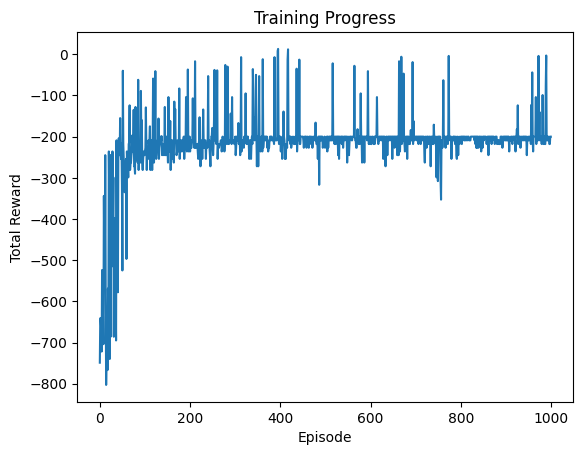

In [6]:
import gym
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import sys

# Create environment with "ansi" render mode (text-based)
env = gym.make("Taxi-v3", render_mode="ansi")

class SARSAAgent:
    def __init__(self, n_actions, alpha=0.1, gamma=0.99, epsilon=0.1, decay=0.995):
        self.q_table = defaultdict(lambda: np.zeros(n_actions))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.decay = decay
        self.n_actions = n_actions

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return np.random.choice(self.n_actions)  # Explore
        return np.argmax(self.q_table[state])  # Exploit

    def update(self, state, action, reward, next_state, next_action):
        current_q = self.q_table[state][action]
        next_q = self.q_table[next_state][next_action] if next_action else 0
        self.q_table[state][action] += self.alpha * (reward + self.gamma * next_q - current_q)

    def decay_epsilon(self):
        self.epsilon = max(0.01, self.epsilon * self.decay)

def train_agent(env, agent, episodes=1000):
    rewards = []
    for episode in range(episodes):
        state, _ = env.reset()
        action = agent.choose_action(state)
        done = False
        total_reward = 0

        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            next_action = agent.choose_action(next_state)
            agent.update(state, action, reward, next_state, next_action)
            state, action = next_state, next_action
            total_reward += reward
            done = terminated or truncated

        agent.decay_epsilon()
        rewards.append(total_reward)
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode + 1}, Reward: {total_reward}, Epsilon: {agent.epsilon:.3f}")
    return rewards

def visualize_episode(env, agent):
    state, _ = env.reset()
    done = False
    frames = []

    while not done:
        action = np.argmax(agent.q_table[state])
        frame = env.render()  # Returns text representation
        frames.append(frame)
        next_state, _, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

    # Print text-based frames
    for i, frame in enumerate(frames):
        print(f"Step {i + 1}:")
        print(frame)

if __name__ == "__main__":
    agent = SARSAAgent(n_actions=env.action_space.n)
    rewards = train_agent(env, agent, episodes=1000)
    visualize_episode(env, agent)
    env.close()

    # Plot training rewards
    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Training Progress")
    plt.show()


Training High Exploration agent...


Training: 100%|█████████████████████████████████| 2000/2000 [00:23<00:00, 83.60it/s]



Training Low Exploration agent...


Training: 100%|█████████████████████████████████| 2000/2000 [00:22<00:00, 89.50it/s]



Training Balanced agent...


Training: 100%|█████████████████████████████████| 2000/2000 [00:22<00:00, 89.77it/s]


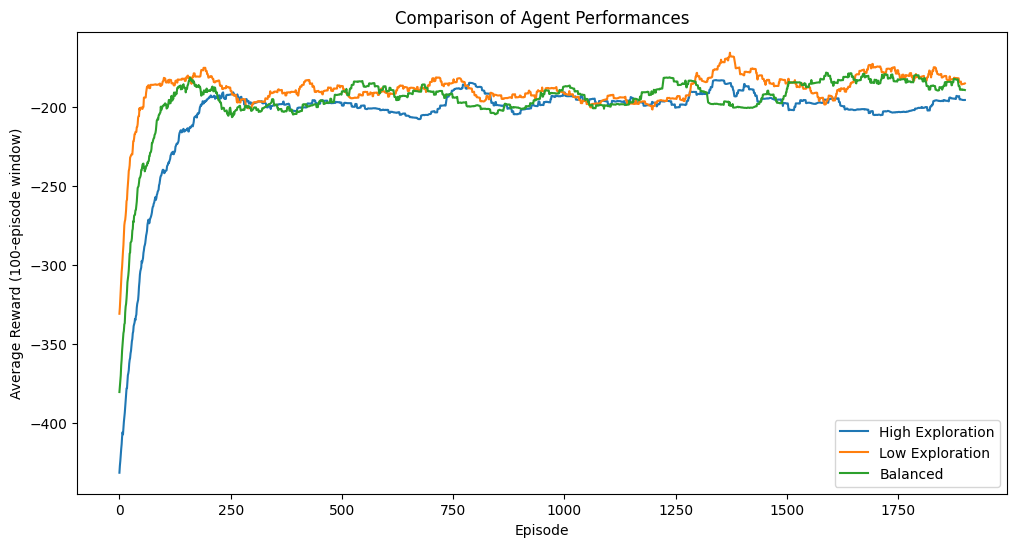


Evaluation Results:

High Exploration:
  Success Rate: 2.00%
  Average Reward: -195.70
  Average Steps: 196.12

Low Exploration:
  Success Rate: 5.00%
  Average Reward: -189.38
  Average Steps: 190.43

Balanced:
  Success Rate: 6.00%
  Average Reward: -187.30
  Average Steps: 188.56


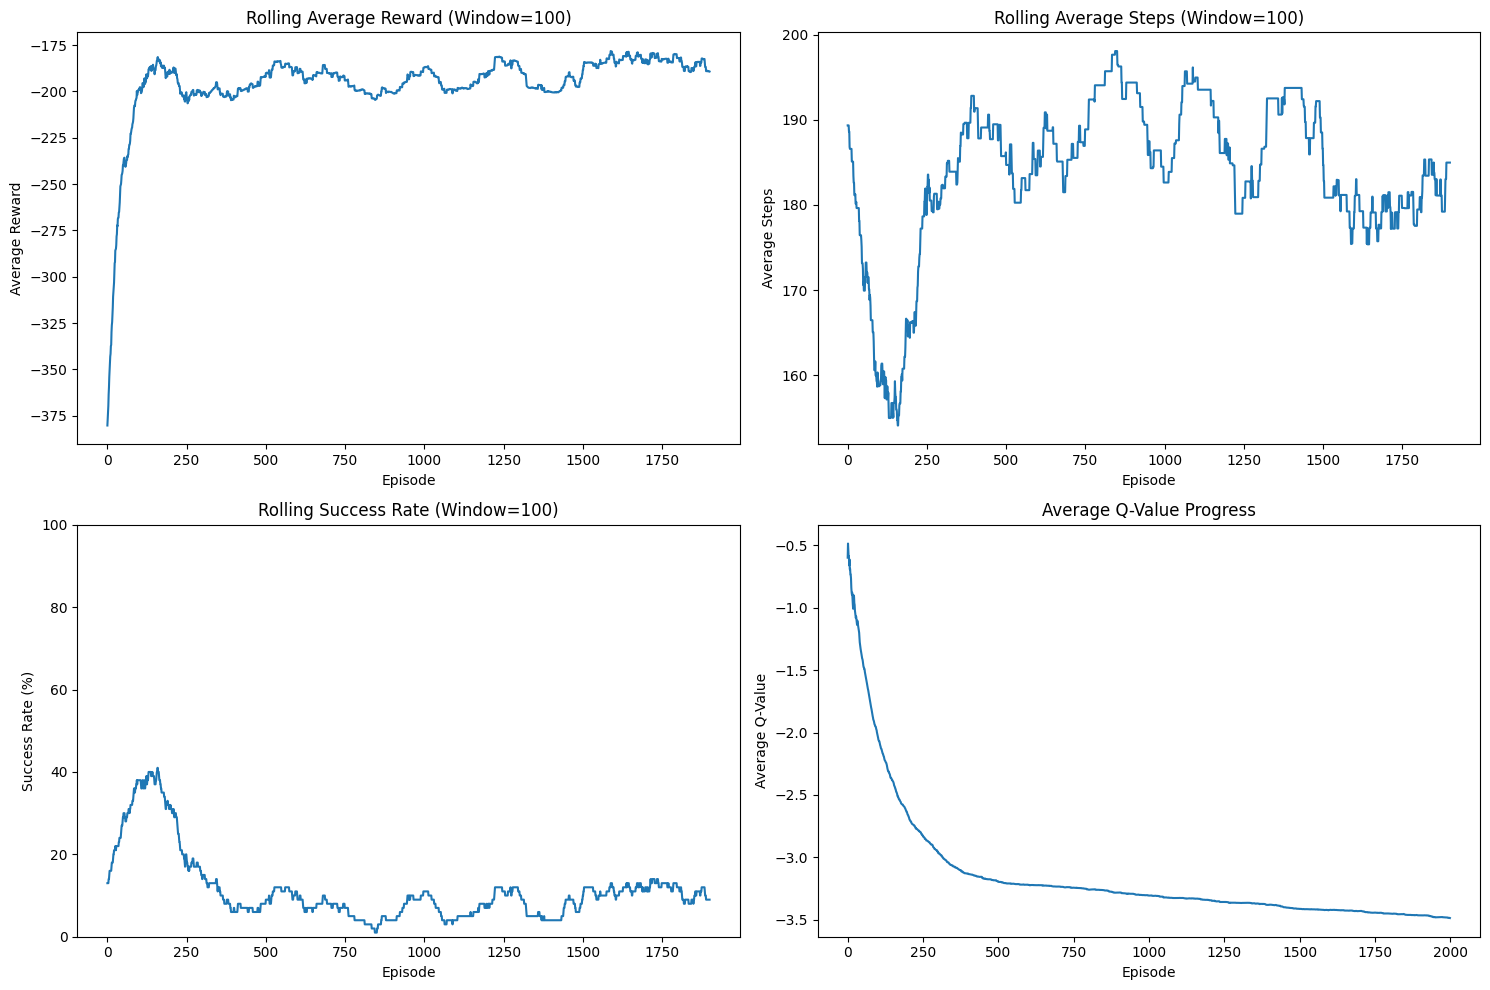

In [7]:
import gym
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm

# Create environment
env = gym.make("Taxi-v3", render_mode="ansi")

class SARSAAgent:
    def __init__(self, n_actions, alpha=0.1, gamma=0.99, 
                 epsilon=0.1, epsilon_decay=0.995, min_epsilon=0.01):
        self.q_table = defaultdict(lambda: np.zeros(n_actions))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.n_actions = n_actions

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return np.random.choice(self.n_actions)
        return np.argmax(self.q_table[state])

    def update(self, state, action, reward, next_state, next_action):
        current_q = self.q_table[state][action]
        next_q = self.q_table[next_state][next_action] if next_action else 0
        self.q_table[state][action] += self.alpha * (reward + self.gamma * next_q - current_q)

    def decay_epsilon(self):
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)

def train_agent(env, agent, episodes=1000):
    metrics = {
        'rewards': [],
        'steps': [],
        'successes': [],
        'epsilons': [],
        'q_values': []
    }
    
    for episode in tqdm(range(episodes), desc="Training"):
        state, _ = env.reset()
        action = agent.choose_action(state)
        total_reward = 0
        steps = 0
        success = False

        while True:
            next_state, reward, terminated, truncated, _ = env.step(action)
            next_action = agent.choose_action(next_state)
            agent.update(state, action, reward, next_state, next_action)
            
            total_reward += reward
            steps += 1
            state = next_state
            action = next_action
            
            if terminated or truncated:
                if reward == 20:  # Successful dropoff
                    success = True
                break

        # Update metrics
        metrics['rewards'].append(total_reward)
        metrics['steps'].append(steps)
        metrics['successes'].append(success)
        metrics['epsilons'].append(agent.epsilon)
        metrics['q_values'].append(np.mean(list(agent.q_table.values())))
        
        agent.decay_epsilon()

    return metrics

def evaluate_agent(env, agent, num_episodes=100):
    original_epsilon = agent.epsilon
    agent.epsilon = 0  # Disable exploration
    
    successes = 0
    total_rewards = []
    steps = []
    
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        episode_reward = 0
        step = 0
        
        while not done:
            action = agent.choose_action(state)
            state, reward, terminated, truncated, _ = env.step(action)
            episode_reward += reward
            step += 1
            done = terminated or truncated
            
            if reward == 20:
                successes += 1
        
        total_rewards.append(episode_reward)
        steps.append(step)
    
    agent.epsilon = original_epsilon  # Restore original epsilon
    
    return {
        'success_rate': successes / num_episodes,
        'avg_reward': np.mean(total_rewards),
        'avg_steps': np.mean(steps),
        'std_reward': np.std(total_rewards)
    }

def plot_training_metrics(metrics, window=100):
    plt.figure(figsize=(15, 10))
    
    # Rolling averages for smoothing
    rolling_rewards = np.convolve(metrics['rewards'], np.ones(window)/window, mode='valid')
    rolling_steps = np.convolve(metrics['steps'], np.ones(window)/window, mode='valid')
    rolling_success = np.convolve(metrics['successes'], np.ones(window)/window, mode='valid') * 100
    
    # Reward Plot
    plt.subplot(2, 2, 1)
    plt.plot(rolling_rewards)
    plt.title(f"Rolling Average Reward (Window={window})")
    plt.xlabel("Episode")
    plt.ylabel("Average Reward")
    
    # Steps Plot
    plt.subplot(2, 2, 2)
    plt.plot(rolling_steps)
    plt.title(f"Rolling Average Steps (Window={window})")
    plt.xlabel("Episode")
    plt.ylabel("Average Steps")
    
    # Success Rate Plot
    plt.subplot(2, 2, 3)
    plt.plot(rolling_success)
    plt.title(f"Rolling Success Rate (Window={window})")
    plt.xlabel("Episode")
    plt.ylabel("Success Rate (%)")
    plt.ylim(0, 100)
    
    # Q-Value Plot
    plt.subplot(2, 2, 4)
    plt.plot(metrics['q_values'])
    plt.title("Average Q-Value Progress")
    plt.xlabel("Episode")
    plt.ylabel("Average Q-Value")
    
    plt.tight_layout()
    plt.show()

def compare_agents(env, configs, episodes=1000):
    results = {}
    
    for name, params in configs.items():
        print(f"\nTraining {name} agent...")
        agent = SARSAAgent(env.action_space.n, **params)
        metrics = train_agent(env, agent, episodes)
        evaluation = evaluate_agent(env, agent)
        results[name] = {
            'metrics': metrics,
            'evaluation': evaluation
        }
    
    # Plot comparison
    plt.figure(figsize=(12, 6))
    for name, result in results.items():
        rolling_rewards = np.convolve(result['metrics']['rewards'], 
                                    np.ones(100)/100, mode='valid')
        plt.plot(rolling_rewards, label=name)
    
    plt.title("Comparison of Agent Performances")
    plt.xlabel("Episode")
    plt.ylabel("Average Reward (100-episode window)")
    plt.legend()
    plt.show()
    
    # Print evaluation metrics
    print("\nEvaluation Results:")
    for name, result in results.items():
        print(f"\n{name}:")
        print(f"  Success Rate: {result['evaluation']['success_rate']:.2%}")
        print(f"  Average Reward: {result['evaluation']['avg_reward']:.2f}")
        print(f"  Average Steps: {result['evaluation']['avg_steps']:.2f}")
    
    return results

if __name__ == "__main__":
    # Define agent configurations to compare
    agent_configs = {
        "High Exploration": {
            "epsilon": 0.5,
            "epsilon_decay": 0.99,
            "alpha": 0.1
        },
        "Low Exploration": {
            "epsilon": 0.1,
            "epsilon_decay": 0.9,
            "alpha": 0.2
        },
        "Balanced": {
            "epsilon": 0.2,
            "epsilon_decay": 0.995,
            "alpha": 0.15
        }
    }
    
    # Run comparison
    results = compare_agents(env, agent_configs, episodes=2000)
    
    # Plot detailed metrics for best agent
    best_agent = max(results.items(), 
                    key=lambda x: x[1]['evaluation']['success_rate'])
    plot_training_metrics(best_agent[1]['metrics'])


Training Fast Decay agent...


Training:   0%|                                            | 0/3000 [00:00<?, ?it/s]C:\Users\SATHVIK\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
Training: 100%|█████████████████████████████████| 3000/3000 [00:34<00:00, 87.54it/s]



Training Slow Decay agent...


Training: 100%|█████████████████████████████████| 3000/3000 [00:35<00:00, 85.19it/s]



Training Adaptive agent...


Training: 100%|█████████████████████████████████| 3000/3000 [00:36<00:00, 81.15it/s]



Training Conservative agent...


Training: 100%|█████████████████████████████████| 3000/3000 [00:30<00:00, 97.13it/s]


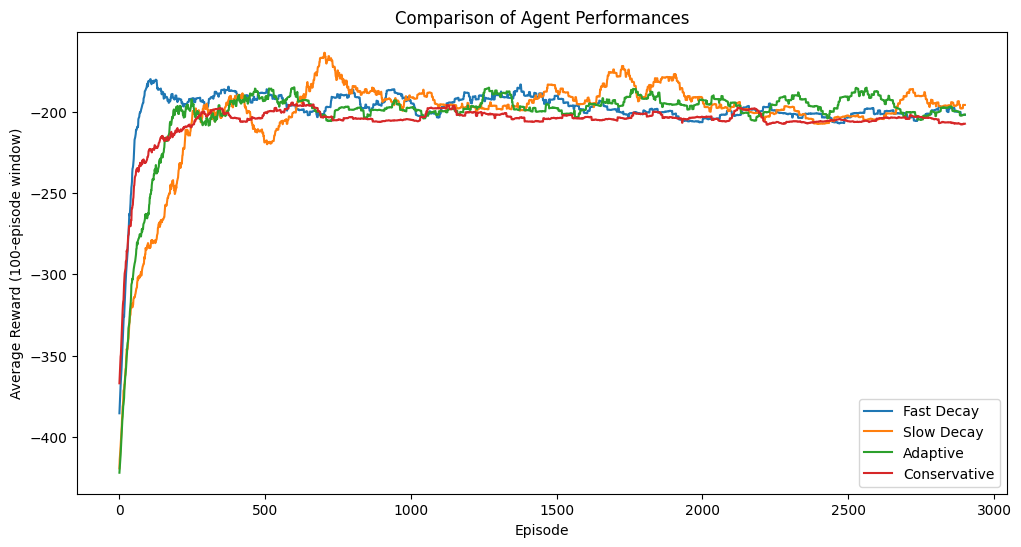


Evaluation Results:

Fast Decay:
  Success Rate: 1.00%
  Average Reward: -197.86
  Average Steps: 198.07

Slow Decay:
  Success Rate: 2.00%
  Average Reward: -195.72
  Average Steps: 196.14

Adaptive:
  Success Rate: 2.00%
  Average Reward: -195.78
  Average Steps: 196.20

Conservative:
  Success Rate: 0.00%
  Average Reward: -218.00
  Average Steps: 200.00


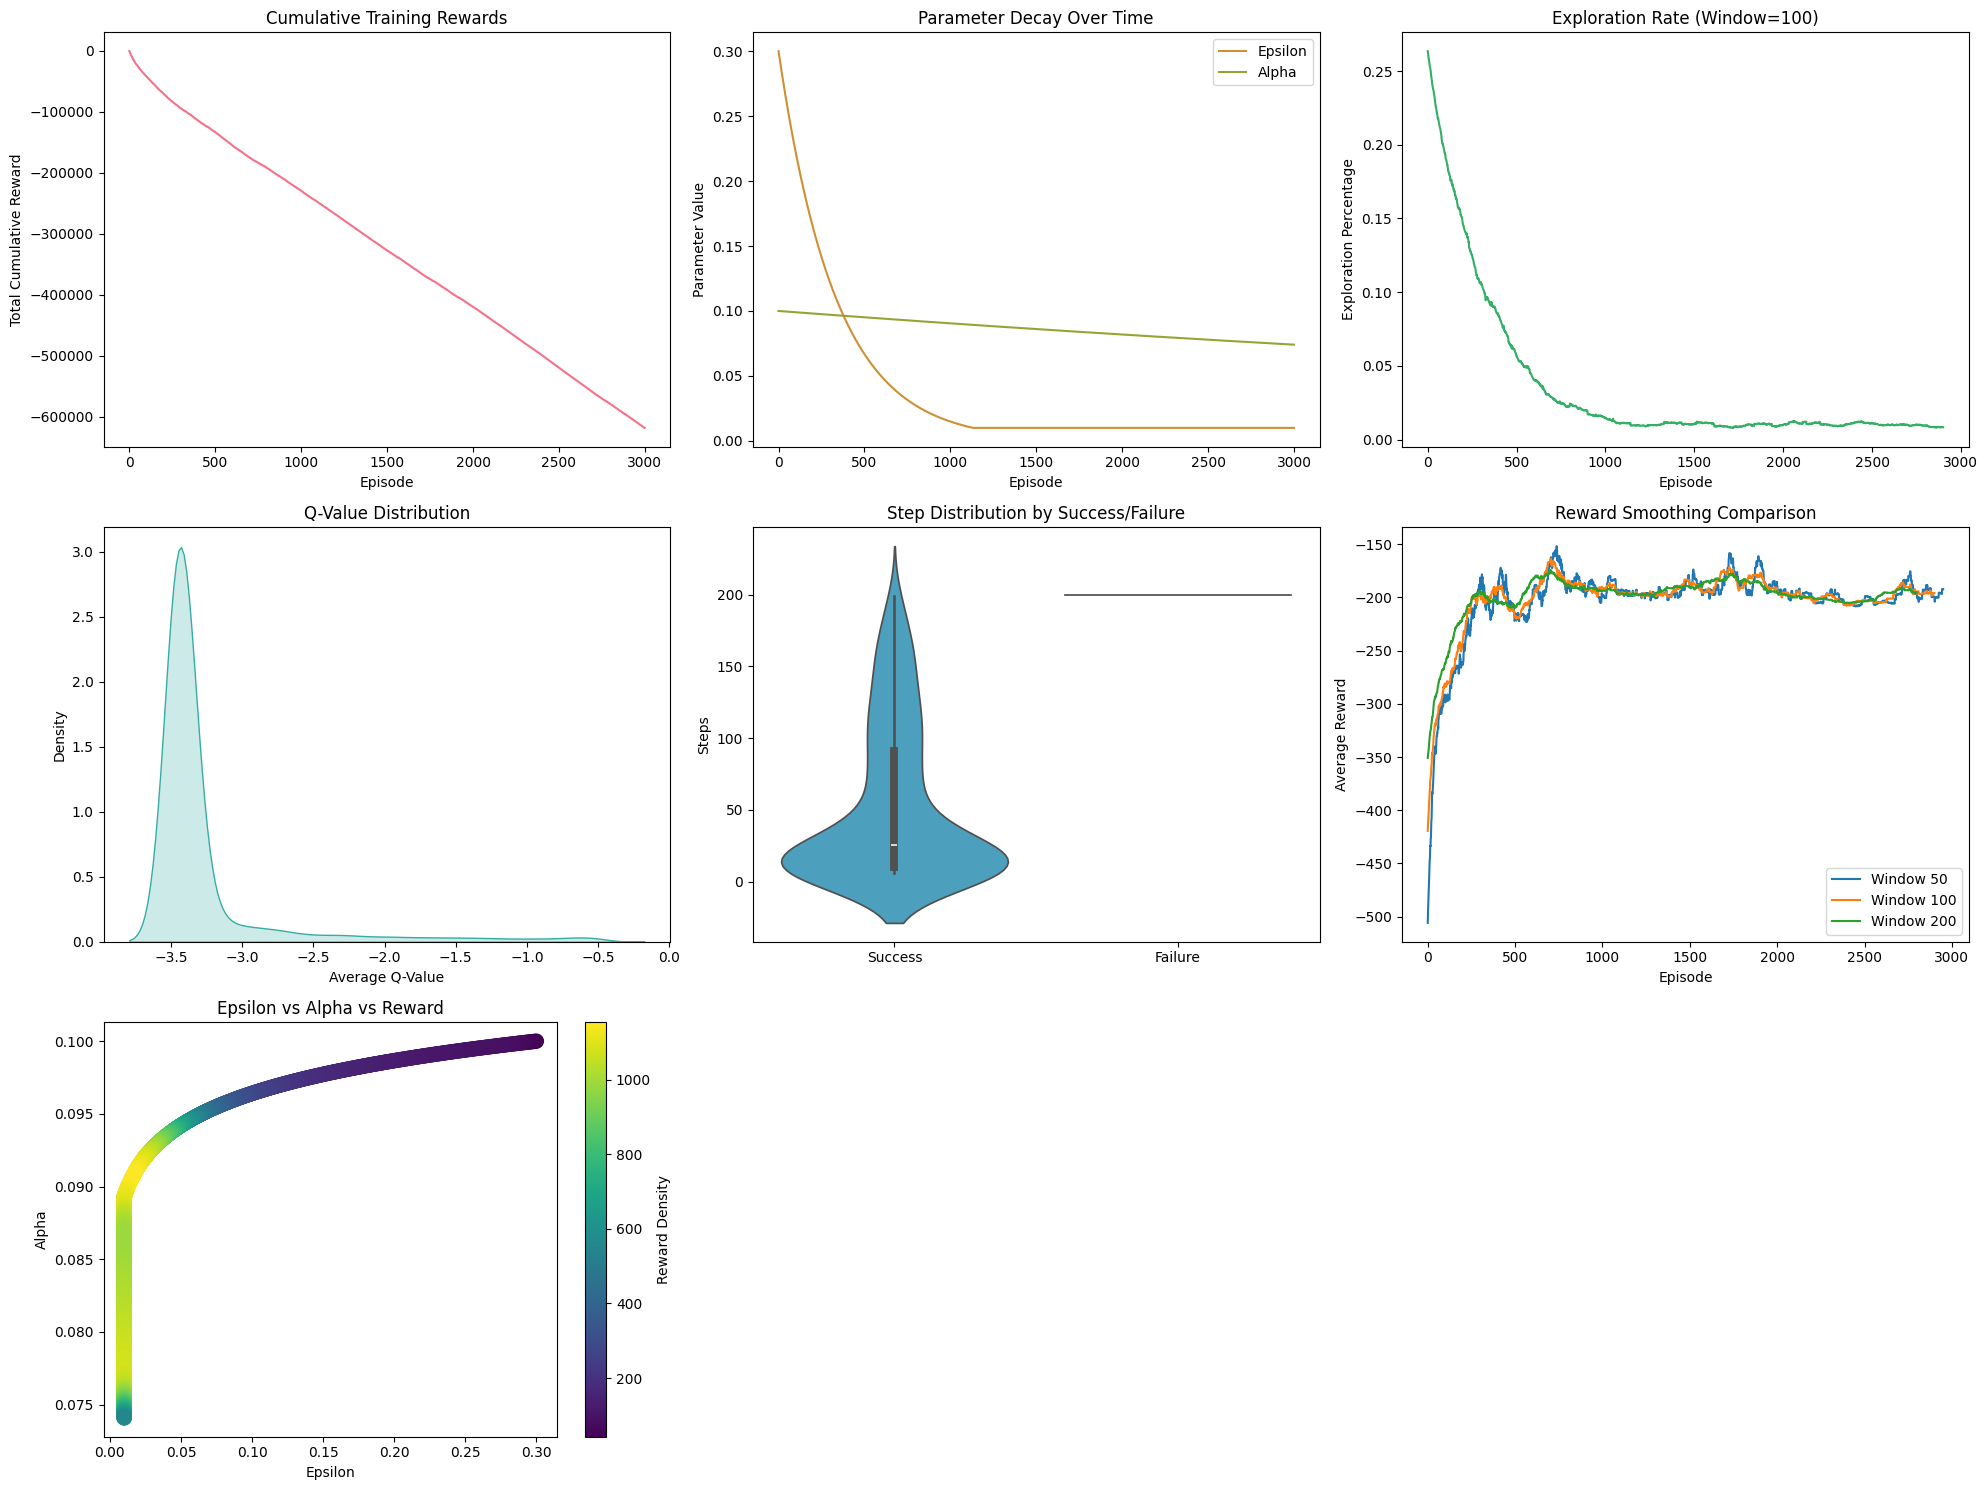

Hyperparameter Search: 100%|████████████████████████| 27/27 [05:36<00:00, 12.47s/it]


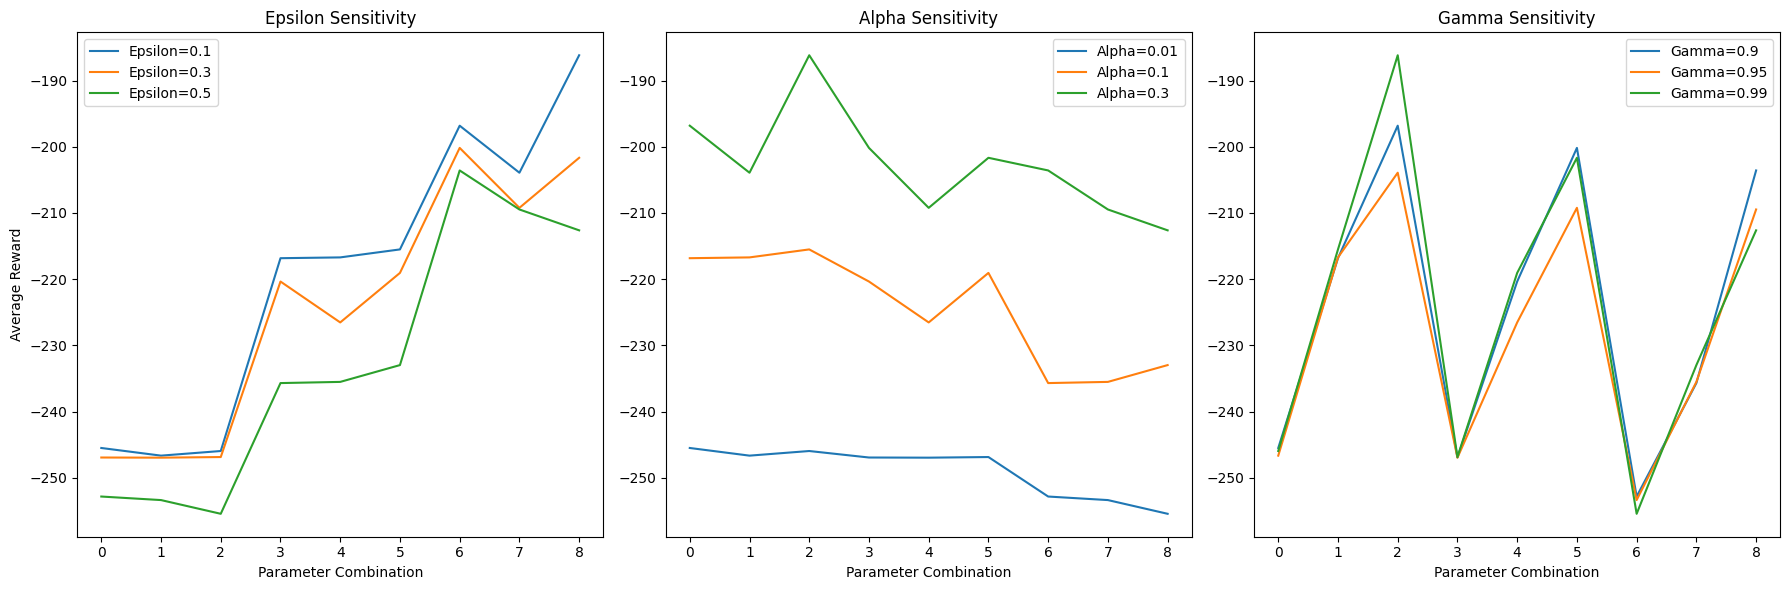

In [8]:
import gym
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.stats import gaussian_kde

# Create environment
env = gym.make("Taxi-v3", render_mode="ansi")

class SARSAAgent:
    def __init__(self, n_actions, alpha=0.1, gamma=0.99, 
                 epsilon=0.1, epsilon_decay=0.995, min_epsilon=0.01,
                 alpha_decay=0.9999, min_alpha=0.01):
        self.q_table = defaultdict(lambda: np.zeros(n_actions))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.min_epsilon = min_epsilon
        self.alpha_decay = alpha_decay
        self.min_alpha = min_alpha
        self.n_actions = n_actions

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return np.random.choice(self.n_actions)
        return np.argmax(self.q_table[state])

    def update(self, state, action, reward, next_state, next_action):
        current_q = self.q_table[state][action]
        next_q = self.q_table[next_state][next_action] if next_action else 0
        self.q_table[state][action] += self.alpha * (reward + self.gamma * next_q - current_q)

    def decay_parameters(self):
        self.epsilon = max(self.min_epsilon, self.epsilon * self.epsilon_decay)
        self.alpha = max(self.min_alpha, self.alpha * self.alpha_decay)

def train_agent(env, agent, episodes=3000):
    metrics = {
        'rewards': [],
        'steps': [],
        'successes': [],
        'epsilons': [],
        'alphas': [],
        'q_values': [],
        'exploration_rates': []
    }
    
    for episode in tqdm(range(episodes), desc="Training"):
        state, _ = env.reset()
        action = agent.choose_action(state)
        total_reward = 0
        steps = 0
        success = False
        exploration_count = 0

        while True:
            next_state, reward, terminated, truncated, _ = env.step(action)
            next_action = agent.choose_action(next_state)
            
            # Track exploration/exploitation
            if random.random() < agent.epsilon:
                exploration_count += 1
                
            agent.update(state, action, reward, next_state, next_action)
            
            total_reward += reward
            steps += 1
            state = next_state
            action = next_action
            
            if terminated or truncated:
                if reward == 20:
                    success = True
                break

        # Update metrics
        metrics['rewards'].append(total_reward)
        metrics['steps'].append(steps)
        metrics['successes'].append(success)
        metrics['epsilons'].append(agent.epsilon)
        metrics['alphas'].append(agent.alpha)
        metrics['q_values'].append(np.mean(list(agent.q_table.values())))
        metrics['exploration_rates'].append(exploration_count/steps)
        
        agent.decay_parameters()

    return metrics

def plot_advanced_metrics(metrics, window=100):
    plt.figure(figsize=(20, 15))
    
    # Create custom color palette
    colors = sns.color_palette("husl", 8)
    
    # 1. Cumulative Reward Plot
    plt.subplot(3, 3, 1)
    cumulative_rewards = np.cumsum(metrics['rewards'])
    plt.plot(cumulative_rewards, color=colors[0])
    plt.title("Cumulative Training Rewards")
    plt.xlabel("Episode")
    plt.ylabel("Total Cumulative Reward")
    
    # 2. Parameter Decay Comparison
    plt.subplot(3, 3, 2)
    plt.plot(metrics['epsilons'], label='Epsilon', color=colors[1])
    plt.plot(metrics['alphas'], label='Alpha', color=colors[2])
    plt.title("Parameter Decay Over Time")
    plt.xlabel("Episode")
    plt.ylabel("Parameter Value")
    plt.legend()
    
    # 3. Exploration/Exploitation Balance
    plt.subplot(3, 3, 3)
    rolling_exploration = np.convolve(metrics['exploration_rates'], 
                                   np.ones(window)/window, mode='valid')
    plt.plot(rolling_exploration, color=colors[3])
    plt.title(f"Exploration Rate (Window={window})")
    plt.xlabel("Episode")
    plt.ylabel("Exploration Percentage")
    
    # 4. Q-Value Distribution
    plt.subplot(3, 3, 4)
    sns.kdeplot(metrics['q_values'], color=colors[4], fill=True)
    plt.title("Q-Value Distribution")
    plt.xlabel("Average Q-Value")
    plt.ylabel("Density")
    
    # 5. Success Rate vs Steps Correlation
    plt.subplot(3, 3, 5)
    success_steps = [s for s, succ in zip(metrics['steps'], metrics['successes']) if succ]
    failure_steps = [s for s, succ in zip(metrics['steps'], metrics['successes']) if not succ]
    sns.violinplot(data=[success_steps, failure_steps], palette=[colors[5], colors[6]])
    plt.title("Step Distribution by Success/Failure")
    plt.xticks([0, 1], ['Success', 'Failure'])
    plt.ylabel("Steps")
    
    # 6. Moving Average Comparison
    plt.subplot(3, 3, 6)
    windows = [50, 100, 200]
    for w in windows:
        rolling = np.convolve(metrics['rewards'], np.ones(w)/w, mode='valid')
        plt.plot(rolling, label=f'Window {w}')
    plt.title("Reward Smoothing Comparison")
    plt.xlabel("Episode")
    plt.ylabel("Average Reward")
    plt.legend()
    
    # 7. 3D Hyperparameter Relationship (Simulated)
    plt.subplot(3, 3, 7)
    x = metrics['epsilons']
    y = metrics['alphas']
    z = metrics['rewards']
    
    # Calculate point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    
    plt.scatter(x, y, c=z, s=100, cmap='viridis')
    plt.colorbar(label='Reward Density')
    plt.title("Epsilon vs Alpha vs Reward")
    plt.xlabel("Epsilon")
    plt.ylabel("Alpha")
    
    plt.tight_layout()
    plt.show()

def hyperparameter_sensitivity_analysis(env):
    # Test different hyperparameter combinations
    param_grid = {
        'epsilon': [0.1, 0.3, 0.5],
        'alpha': [0.01, 0.1, 0.3],
        'gamma': [0.9, 0.95, 0.99]
    }
    
    results = []
    
    # Generate all combinations
    from itertools import product
    combinations = list(product(*param_grid.values()))
    
    for combo in tqdm(combinations, desc="Hyperparameter Search"):
        params = dict(zip(param_grid.keys(), combo))
        agent = SARSAAgent(env.action_space.n, **params)
        metrics = train_agent(env, agent, 1000)
        evaluation = evaluate_agent(env, agent)
        results.append({
            'params': params,
            'metrics': metrics,
            'evaluation': evaluation
        })
    
    # Plot sensitivity analysis
    plt.figure(figsize=(18, 6))
    
    # Epsilon sensitivity
    plt.subplot(1, 3, 1)
    for eps in param_grid['epsilon']:
        eps_results = [r for r in results if r['params']['epsilon'] == eps]
        avg_rewards = [np.mean(r['metrics']['rewards']) for r in eps_results]
        plt.plot(avg_rewards, label=f'Epsilon={eps}')
    plt.title("Epsilon Sensitivity")
    plt.xlabel("Parameter Combination")
    plt.ylabel("Average Reward")
    plt.legend()
    
    # Alpha sensitivity
    plt.subplot(1, 3, 2)
    for alpha in param_grid['alpha']:
        alpha_results = [r for r in results if r['params']['alpha'] == alpha]
        avg_rewards = [np.mean(r['metrics']['rewards']) for r in alpha_results]
        plt.plot(avg_rewards, label=f'Alpha={alpha}')
    plt.title("Alpha Sensitivity")
    plt.xlabel("Parameter Combination")
    plt.legend()
    
    # Gamma sensitivity
    plt.subplot(1, 3, 3)
    for gamma in param_grid['gamma']:
        gamma_results = [r for r in results if r['params']['gamma'] == gamma]
        avg_rewards = [np.mean(r['metrics']['rewards']) for r in gamma_results]
        plt.plot(avg_rewards, label=f'Gamma={gamma}')
    plt.title("Gamma Sensitivity")
    plt.xlabel("Parameter Combination")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return results

if __name__ == "__main__":
    # Extended agent configurations
    agent_configs = {
        "Fast Decay": {
            "epsilon": 0.5,
            "epsilon_decay": 0.98,
            "alpha": 0.2,
            "alpha_decay": 0.9995
        },
        "Slow Decay": {
            "epsilon": 0.3,
            "epsilon_decay": 0.997,
            "alpha": 0.1,
            "alpha_decay": 0.9999
        },
        "Adaptive": {
            "epsilon": 0.4,
            "epsilon_decay": 0.995,
            "alpha": 0.15,
            "alpha_decay": 0.9997
        },
        "Conservative": {
            "epsilon": 0.2,
            "epsilon_decay": 0.99,
            "alpha": 0.05,
            "alpha_decay": 0.999
        }
    }
    
    # Run extended comparison
    results = compare_agents(env, agent_configs, episodes=3000)
    
    # Plot advanced metrics
    best_agent = max(results.items(), 
                    key=lambda x: x[1]['evaluation']['success_rate'])
    plot_advanced_metrics(best_agent[1]['metrics'])
    
    # Run sensitivity analysis
    sensitivity_results = hyperparameter_sensitivity_analysis(env)

In [9]:
def plot_cumulative_rewards(metrics, save_path=None):
    plt.figure(figsize=(10, 6))
    cumulative_rewards = np.cumsum(metrics['rewards'])
    plt.plot(cumulative_rewards, color='royalblue', linewidth=2)
    plt.title("Cumulative Training Rewards", fontsize=14)
    plt.xlabel("Episode", fontsize=12)
    plt.ylabel("Total Cumulative Reward", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    if save_path: plt.savefig(save_path)
    plt.show()

def plot_parameter_decay(metrics, save_path=None):
    plt.figure(figsize=(10, 6))
    plt.plot(metrics['epsilons'], label='Epsilon', color='crimson', linewidth=2)
    plt.plot(metrics['alphas'], label='Alpha', color='darkorange', linewidth=2)
    plt.title("Parameter Decay Over Time", fontsize=14)
    plt.xlabel("Episode", fontsize=12)
    plt.ylabel("Parameter Value", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    if save_path: plt.savefig(save_path)
    plt.show()

def plot_exploration_rate(metrics, window=100, save_path=None):
    plt.figure(figsize=(10, 6))
    rolling_exploration = np.convolve(metrics['exploration_rates'], 
                                    np.ones(window)/window, mode='valid')
    plt.plot(rolling_exploration, color='forestgreen', linewidth=2)
    plt.title(f"Exploration Rate (Moving Average, Window={window})", fontsize=14)
    plt.xlabel("Episode", fontsize=12)
    plt.ylabel("Exploration Percentage", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    if save_path: plt.savefig(save_path)
    plt.show()

def plot_q_value_distribution(metrics, save_path=None):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(metrics['q_values'], color='purple', fill=True, bw_adjust=0.5)
    plt.title("Q-Value Distribution Density", fontsize=14)
    plt.xlabel("Average Q-Value", fontsize=12)
    plt.ylabel("Probability Density", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    if save_path: plt.savefig(save_path)
    plt.show()

def plot_success_failure_steps(metrics, save_path=None):
    plt.figure(figsize=(10, 6))
    success_steps = [s for s, succ in zip(metrics['steps'], metrics['successes']) if succ]
    failure_steps = [s for s, succ in zip(metrics['steps'], metrics['successes']) if not succ]
    
    sns.violinplot(data=[success_steps, failure_steps], 
                 palette=['limegreen', 'tomato'],
                 inner="quartile")
    plt.title("Step Distribution by Episode Success", fontsize=14)
    plt.xticks([0, 1], ['Successful Episodes', 'Failed Episodes'])
    plt.ylabel("Steps per Episode", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    if save_path: plt.savefig(save_path)
    plt.show()

def plot_moving_averages(metrics, windows=[50, 100, 200], save_path=None):
    plt.figure(figsize=(10, 6))
    for w in windows:
        rolling = np.convolve(metrics['rewards'], np.ones(w)/w, mode='valid')
        plt.plot(rolling, label=f'{w}-Episode Window', linewidth=2)
    plt.title("Reward Moving Averages Comparison", fontsize=14)
    plt.xlabel("Episode", fontsize=12)
    plt.ylabel("Average Reward", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    if save_path: plt.savefig(save_path)
    plt.show()

def plot_hyperparameter_relationship(metrics, save_path=None):
    plt.figure(figsize=(10, 6))
    x = metrics['epsilons']
    y = metrics['alphas']
    z = gaussian_kde(np.vstack([x,y]))(np.vstack([x,y]))
    
    scatter = plt.scatter(x, y, c=z, s=50, cmap='viridis', alpha=0.7)
    cbar = plt.colorbar(scatter)
    cbar.set_label('Reward Density', fontsize=12)
    
    plt.title("Epsilon vs Alpha Parameter Relationship", fontsize=14)
    plt.xlabel("Epsilon Value", fontsize=12)
    plt.ylabel("Alpha Value", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    if save_path: plt.savefig(save_path)
    plt.show()

def plot_training_progress(metrics, window=100, save_path=None):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    color = 'tab:blue'
    ax1.set_xlabel('Episode', fontsize=12)
    ax1.set_ylabel('Reward', color=color, fontsize=12)
    reward_line = ax1.plot(
        np.convolve(metrics['rewards'], np.ones(window)/window, mode='valid'),
        color=color, 
        label='Reward'
    )
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Success Rate (%)', color=color, fontsize=12)
    success_line = ax2.plot(
        np.convolve(metrics['successes'], np.ones(window)/window, mode='valid')*100,
        color=color,
        label='Success Rate'
    )
    ax2.tick_params(axis='y', labelcolor=color)
    
    plt.title(f"Training Progress (Window={window})", fontsize=14)
    fig.tight_layout()
    if save_path: plt.savefig(save_path)
    plt.show()

In [12]:
# Initialize and train agent
agent = SARSAAgent(env.action_space.n)
metrics = train_agent(env, agent, episodes=3000)

Training: 100%|████████████████████████████████| 3000/3000 [00:28<00:00, 104.00it/s]


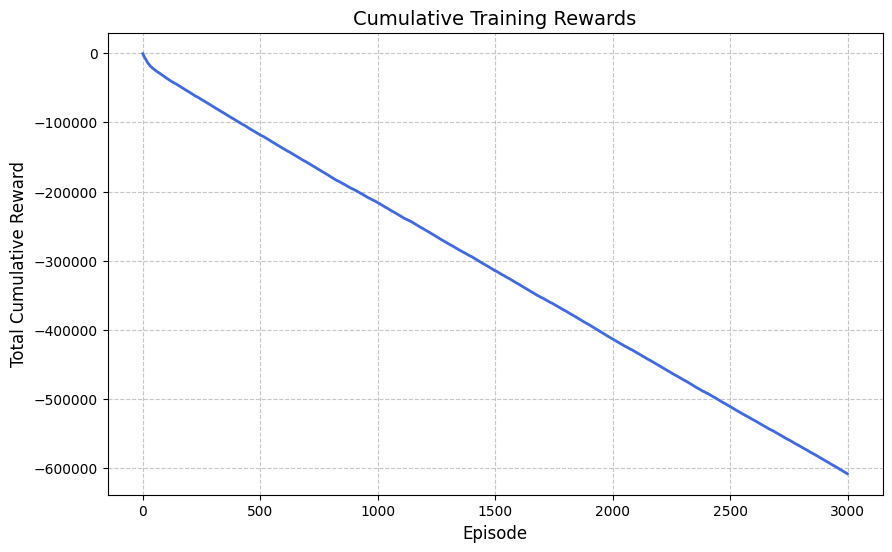

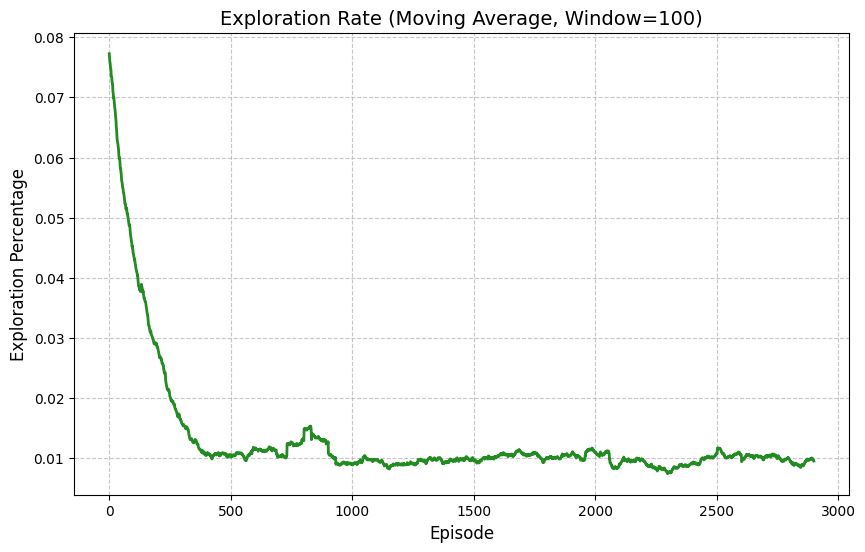

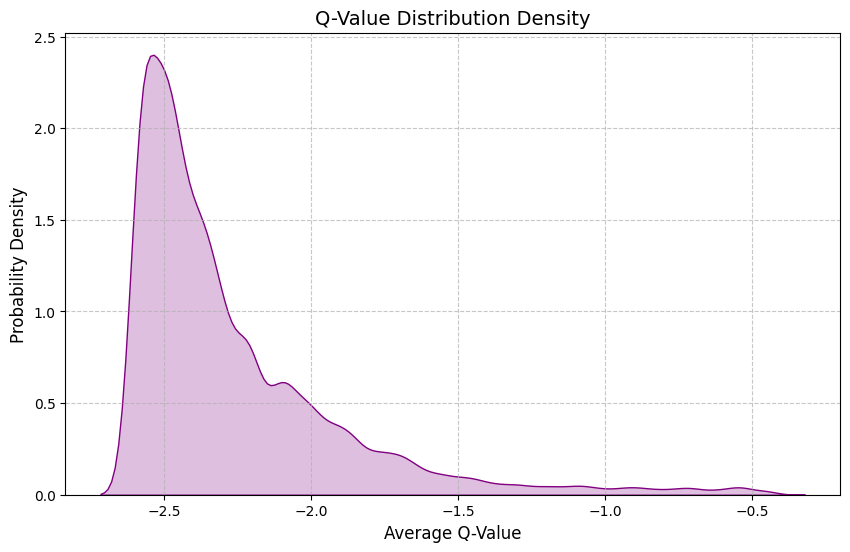

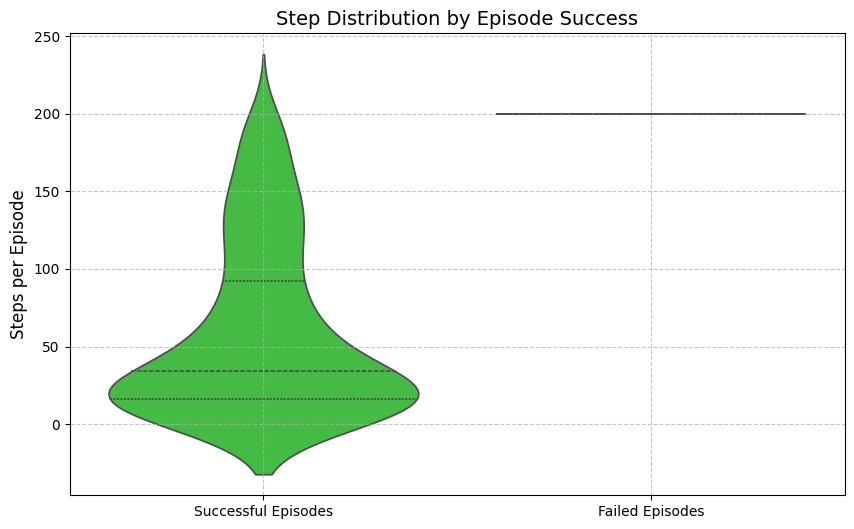

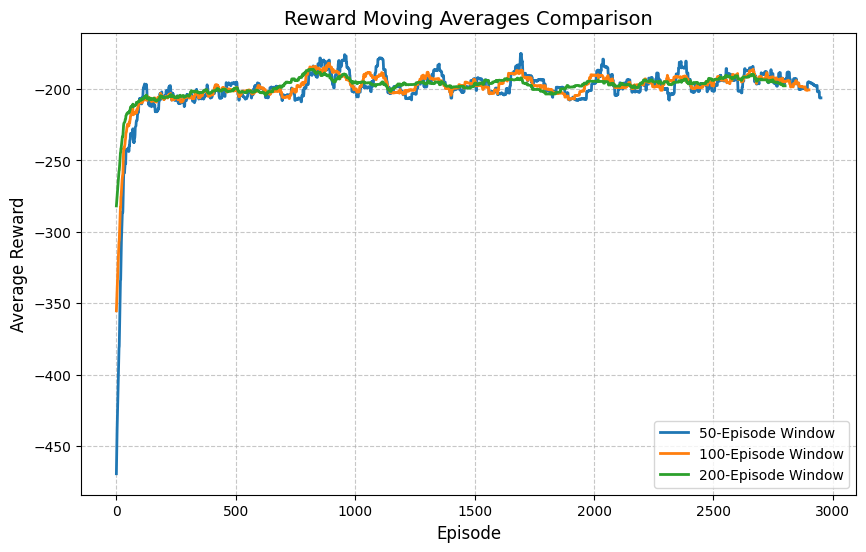

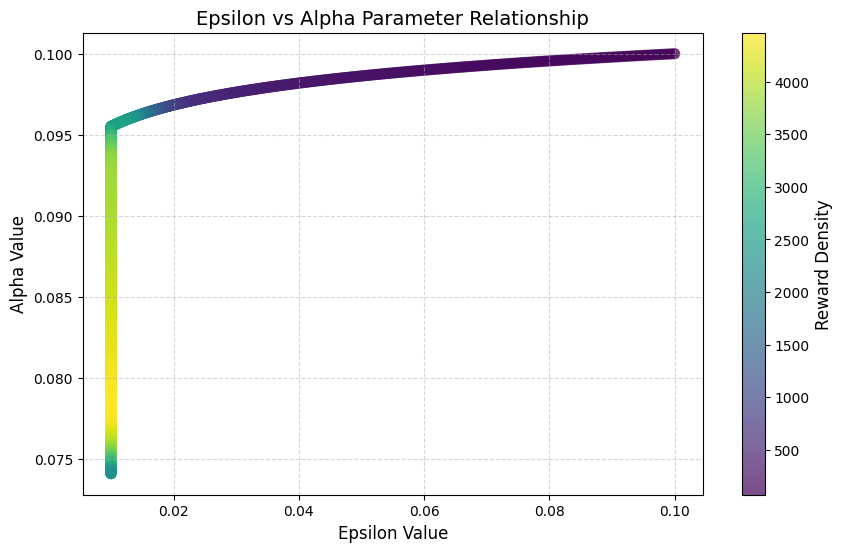

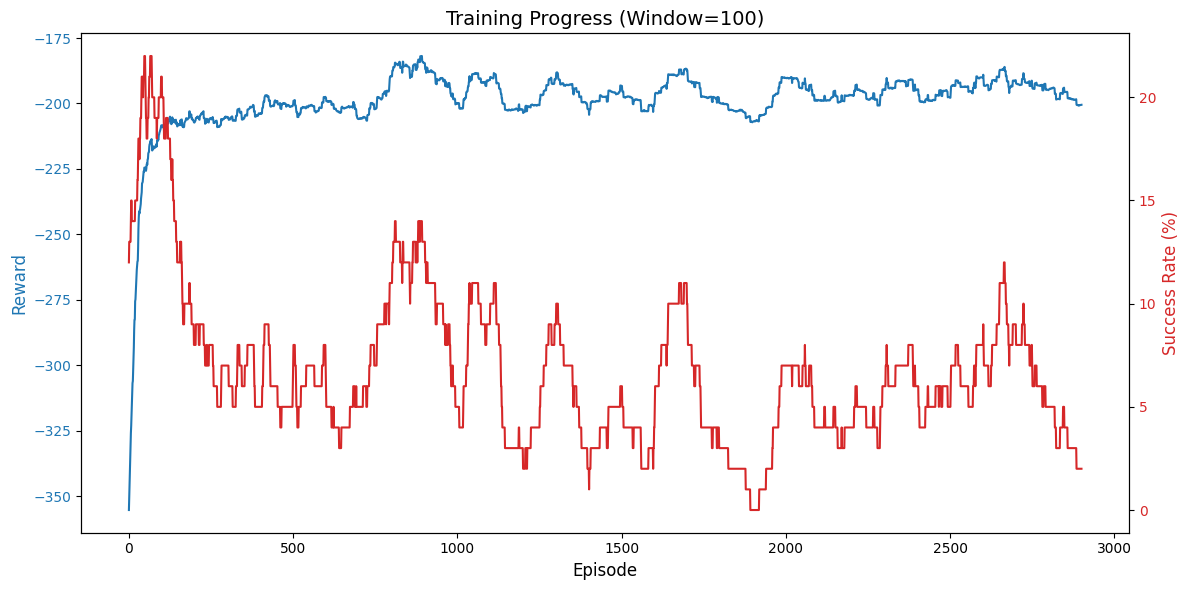

In [13]:
# Cumulative rewards progression
plot_cumulative_rewards(metrics, save_path='cumulative_rewards.png')

# Exploration/exploitation balance
plot_exploration_rate(metrics, window=100)

# Q-value distribution analysis
plot_q_value_distribution(metrics)

# Step distribution comparison
plot_success_failure_steps(metrics)

# Moving average analysis
plot_moving_averages(metrics, windows=[50, 100, 200])

# Hyperparameter relationship
plot_hyperparameter_relationship(metrics)

# Combined training progress
plot_training_progress(metrics, window=100)

In [ ]:
# Cell 1: SARSA Metrics Plotting
import numpy as np
import matplotlib.pyplot as plt

def moving_average(x, window):
    return np.convolve(x, np.ones(window)/window, mode='valid')

# Unpack SARSA metrics
rewards = np.array(sarsa_metrics['rewards'])
steps = np.array(sarsa_metrics['steps'])
success = np.array(sarsa_metrics['successes'], dtype=float) * 100  # percent
q_vals = np.array(sarsa_metrics['q_values'])
window = 100

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(rewards, alpha=0.3, label='Reward')
plt.plot(moving_average(rewards, window), label=f'{window}-ep MA', linewidth=2)
plt.title('SARSA: Episode Reward')
plt.xlabel('Episode'); plt.ylabel('Reward'); plt.legend()

plt.subplot(2, 2, 2)
plt.plot(steps, alpha=0.3, label='Steps')
plt.plot(moving_average(steps, window), label=f'{window}-ep MA', linewidth=2)
plt.title('SARSA: Steps per Episode')
plt.xlabel('Episode'); plt.ylabel('Steps'); plt.legend()

plt.subplot(2, 2, 3)
plt.plot(moving_average(success, window), color='green')
plt.title('SARSA: Success Rate (%)')
plt.xlabel('Episode'); plt.ylabel('Success Rate (%)'); 

plt.subplot(2, 2, 4)
plt.plot(q_vals, color='purple')
plt.title('SARSA: Average Q-Value')
plt.xlabel('Episode'); plt.ylabel('Q-Value')

plt.tight_layout()
plt.show()
